<a href="https://colab.research.google.com/github/Jaypardeshii/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Bank Marketing Effectiveness Prediction**

##**Problem statement**
The data is related with direct marketing campaigns (phone calls) of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## **Summary**

- Banks are required to sell more long-term bank deposits to enhance their cash reserves right ?

- Bank profitability depends on long-term deposits and Marketing executives are therefore under pressure to persuade the general public to buy long-term deposits. To increase the positive response rate, marketing managers should build better use of their limited resources by making fewer calls to customers while closing more sales. Because they already contain data from prior
campaigns to examine, managers may utilize data classification techniques to
determine clients in near future.

- The dataset class is labelled as ‘yes’ or ‘no’ depending on whether the contacted client has subscribed to the term deposit or not. It is a marketing problem and the outcome will largely influence the future strategies of bank. Banking institute has a very large client base and even larger target clients.

- In real world , less clients will respond positively to marketing campaign and most of them will say no. Contacting all of them is time consuming task and demands tremendous time and efforts. To manage the human resource in efficient way, it is necessary to correctly identify those clients who have more chances of saying yes. This is where machine learning comes into picture.

## **Objective**

The main objective is to build a predictive model that predicts whether a new client will subscribe to a term deposit or not, based on data from previous marketing campaigns.

## **Importing Neccessary Libraries**

In [88]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# For data visualization

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [89]:
# Mounting the Google Drive to access data.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
# Loading the dataset

file_path = '/content/drive/MyDrive/Datasets/bank_dataset.csv'

df = pd.read_csv(file_path)

## **Dataset Inspection**

In [91]:
# checking first 5 rows
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [92]:
# checking last 5 rows
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [93]:
# List of columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### **Attributes and their Description:-**

**Bank Client data :**

`Age :-` Age of client.

`Job :-` The job of clients. It has 12 categories including unknown.

`Marital :-` Marital status of the customer. It has 3 categories.

`Education :-` The level of education of the customer.

`Default :-` It tells whether the customer has credit in default or not.

`Balance :-`  It specifies the account balance of the customer.

`Housing :-` Whether the customer has a housing loan or not.

`Loan :-` Whether the customer has a personal loan or not.

---
**Related with the last contact of the current campaign :**

`Contact :-` The method of communication used to contact the customer.

`Month :-` The month of the year on which the customer was last contacted.

`Day :-` The day of the month on which the customer was last contacted.

`Duration :-` The duration of the last contact with the customer in seconds.

---
**Other attributes :**

`Campaign :-` The number of contacts performed during the current marketing campaign for this customer.

`Pdays :-` the number of days that passed by after the customer was last contacted from a previous campaign. some value is **-1** if the client was not contacted previously.

`Previous :-` Number of times this client was contacted before this campaign.

`Poutcome :-`The outcome of the previous marketing campaign for this customer.

`Deposit(y) :-` Whether the customer has subscribed to a term deposit Yes or No. (the target variable)

In [94]:
# Checking number of rows and columns in our dataset.
df.shape

(45211, 17)

In [95]:
# Brief information about the datatype of attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- **7** features are numerical and **10** fetaures are categorical.

- Changing categorical columns from **object to category** data type can **reduce memory usage** in pandas DataFrame because "category" data type creates a mapping between unique values and integers, requiring less memory than storing actual string values.

In [96]:
# check the duplicate rows

df.duplicated().sum()

0

- There are no any rows in the dataset that are exact duplicates of each other.

In [97]:
#check for null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- There are no any null values in dataset.

In [98]:
# describe all the numerical columns
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

- The **pdays column** contains values of **-1**, which indicate that certain customers were not contacted previously as part of the bank's marketing campaign.

- The dataset includes a **large number of new customers**, as evidenced by the prevalence of 0 values in column previous, which suggest that many customers have not previously been contacted before this campaign.

- The balance column contains some negative values, which could indicate that certain customers have overdrawn on their accounts or have outstanding debts. These **negative balances** suggest that some customers may be experiencing financial difficulties or challenges.


In [99]:
# check target columns value counts

df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

- The target column is highly imbalanced, with a **low ratio of positive responses (yes) to negative responses (no).** This is expected in a marketing campaign, as only a **small percentage of the target audience may be interested in the product being offered**, such as a term deposit in this case. However, the significant overrepresentation of "no" responses compared to "yes" responses suggests a class imbalance, which should be accounted for when building predictive models to ensure accurate results.

## **Data Cleaning**

In [100]:
# create new data frame from original dataset for further data analysis.

bank_df = df.copy()

In [101]:
# change the datatype of columns

# get the names of all categorical columns
categorical_columns = bank_df.select_dtypes(include='object').columns

# convert all categorical columns to 'category' data type
bank_df[categorical_columns] = bank_df[categorical_columns].astype('category')

# check the data types of all columns
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [102]:
# check how many customers balance is 0 or negative

bank_df[(bank_df['balance']<=0)].value_counts().sum()

7280

In [103]:
# check how many customers subscribed to term deposit despite having a balance of 0 or negative

bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes')].value_counts().sum()

502

- It seems strange that there are **7280 customers with a zero or negative bank balance** who also have housing loans or personal loans or credit in default. Out of these 7280 customers, 502 customers would subscribe to a term deposit.

-  there is a very low percentage(6.8%) of customers with a negative or zero bank balance who subscribed to a term deposit. This could indicate that there is some error in the data or that these customers are not a good target for marketing campaigns.

- We need to further investigate the data to determine if there are any discernible patterns.

In [104]:
# find out the percentage of customers with a primary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['education']=='primary')].value_counts().sum() /
          bank_df[(bank_df['balance']<=0) & (bank_df['education']=='primary')].value_counts().sum()*100,2)) + '%'

'5.24%'

In [105]:
# find out the percentage of customers with a secondary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['education']=='secondary')].value_counts().sum() /
          bank_df[(bank_df['balance']<=0) & (bank_df['education']=='secondary')].value_counts().sum()*100,2)) + '%'

'6.47%'

In [106]:
# find out the percentage of customers with a tertiary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['education']=='tertiary')].value_counts().sum() /
          bank_df[(bank_df['balance']<=0) & (bank_df['education']=='tertiary')].value_counts().sum()*100,2)) + '%'

'9.37%'

In [107]:
# find out the percentage of customers who student and who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['job']=='student')].value_counts().sum() /
          bank_df[(bank_df['balance']<=0) & (bank_df['job']=='student')].value_counts().sum()*100,2)) + '%'

'18.97%'

In [108]:
# find out the percentage of customers who retired and who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['job']=='retired')].value_counts().sum() /
          bank_df[(bank_df['balance']<=0) & (bank_df['job']=='retired')].value_counts().sum()*100,2)) + '%'

'11.85%'

**Observations:-**
- Among customers with a non-positive bank balance, those with a tertiary education have the highest percentage of subscribing to a term deposit (9.3%), followed by secondary education (6.4%) and primary education (5.2%).

- Students with a non-positive bank balance have the highest percentage of subscribing to a term deposit (18.8%), followed by retired customers (11.8%).

- Out of the total 7280 customers with a non-positive bank balance, only 502 subscribed to a term deposit, indicating that the majority of customers with a non-positive bank balance did not subscribe to a term deposit.

- It may be useful to gather additional information on these customers, such as their financial history and reasons for having a non-positive bank balance, to gain a better understanding of their behavior and improve targeting of future marketing campaigns.

- but there is no any clear relationship between any of the columns. The data is imbalanced and does not make sense. Negative or zero bank balance and outstanding loans make it unlikely for customers to subscribe to term deposits. Therefore, we consider this a type of outlier.

- We decided to drop the 502 values of customers with a non-positive bank balance who subscribed to term deposits to eliminate outliers. This action is taken based on real time scinario because this is not make sense right ? which will save man-hours and resources while yielding more accurate predictions.

In [109]:
# Dropping unnecessary rows

bank_df = bank_df.drop(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes')].index)

In [110]:
# shape of the dataset after removing unnecessary data

bank_df.shape

(44709, 17)

## **EDA and Visualization**

Splitting the data in numerical and categorical columns

In [111]:
# find categorical variables

categorical_columns = [column for column in bank_df.columns if (bank_df[column].dtypes=='category')]
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [112]:
# find numerical variables

numerical_columns = [column for column in bank_df.columns if (bank_df[column].dtypes!='category')]
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

#### **Univariate and Bivariate Analysis of catagorical variables**

In [113]:
fig = px.histogram(bank_df, x='y', color='y')
fig.update_layout(xaxis_title='Term deposit subscription',yaxis_title='Total Count of customers')
fig.show()

- Based on the analysis of the target column "y" (term deposit subscription), we found a significant gap in the ratio of customers who subscribed to the term deposit and those who did not. The ratio of non-subscribed to subscribed customers is 88:12, indicating that the bank invested a considerable amount of time, resources, and manpower without generating the desired outcome. To overcome this issue, we build a predictive model that can efficiently identify potential customers likely to subscribe to the term deposit, saving time and resources.

- However, the data is also imbalanced, which can impact the accuracy of the predictive model. we implementing various techniques in feature engineering to balance the dataset and improve model performance.

In [114]:
# check the job categories wise bank customers total count using univariate analysis

fig = px.histogram(bank_df, x='job', color='job')
fig.update_layout(xaxis_title='Job Categories of Bank Customers',yaxis_title='Total Count of customers')
fig.show()

- Based on the visualization of job categories of bank customers, we can observe that the bank tends to target customers with job roles such as management, blue-collar, technician, admin, and services. On the other hand, customers with job roles such as entrepreneurs, self-employed, unemployed, students, and housemaids are less likely to be targeted by the bank.

- This observation makes sense as job roles such as management, blue-collar, technician, admin, and services are more likely to have a steady income and financial stability, which makes them potential candidates for bank services such as loans, credit cards, and other financial products. On the other hand, job roles such as self-employed, unemployed, and students are less likely to have a steady income, which makes them less likely to be targeted by the bank.

In [115]:
# check the job categories wise customers who subscribe term deposit or not.

plt.figure(figsize=(18,6))
sns.countplot(x='job',hue='y', data=bank_df, order=bank_df['job'].value_counts().index)
plt.xlabel('Job Categories of Bank Customers', color='black')
plt.ylabel('Total Count of customers', color='black')
plt.tight_layout()
plt.show()

- The histogram of job categories of bank customers shows that the bank targets more customers in job categories such as management, blue-collar, technician, admin, and services, while contacting fewer customers in job categories such as entrepreneurs, self-employed, unemployed, students, and housemaids. However, it is interesting to note that the customers in job categories of students and retired show a higher ratio of subscribing to term deposit compared to other job categories.

- The bank should focus more on job categories such as students and retired to increase the subscription rate

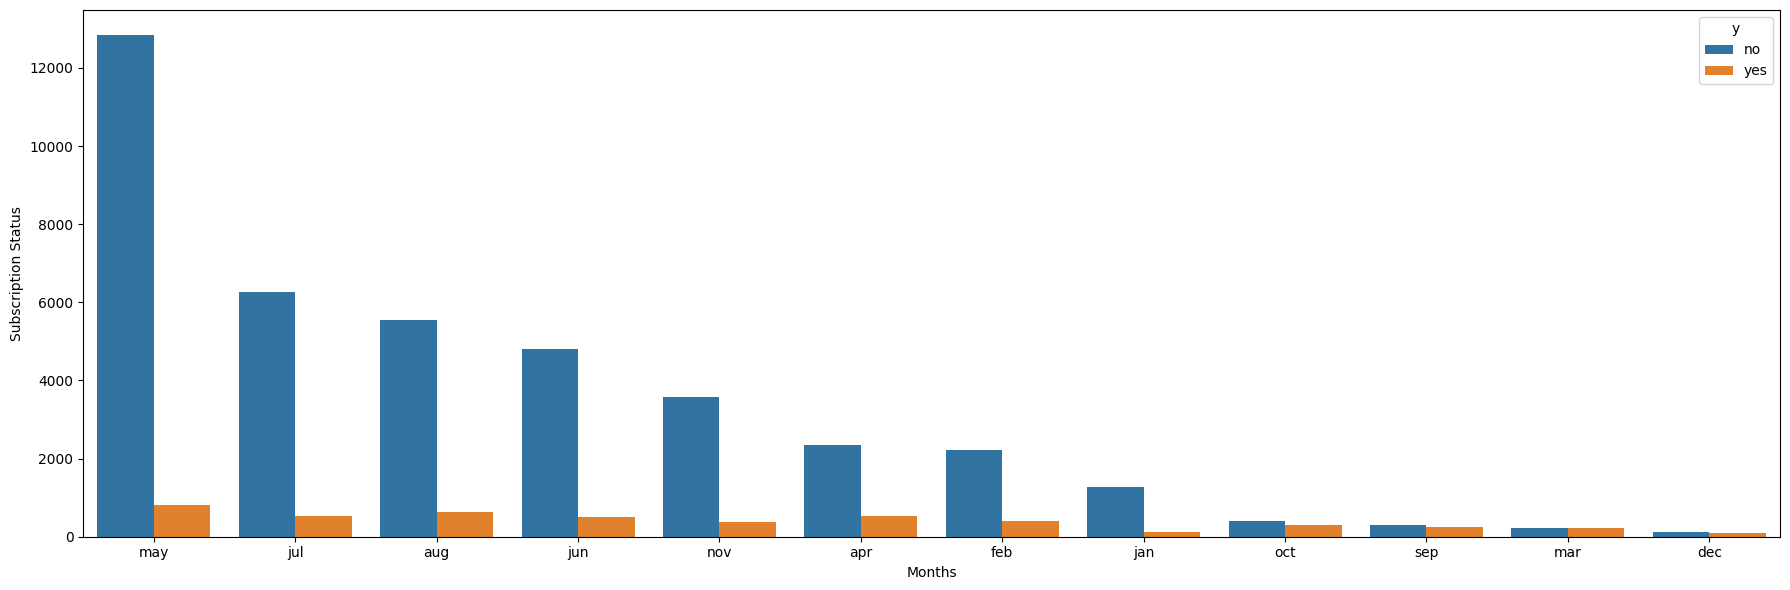

In [116]:
# check the Subscription Status per month using bivariate analysis

plt.figure(figsize=(18,6))
sns.countplot(x='month',hue='y', data=bank_df, order=bank_df['month'].value_counts().index)
plt.xlabel('Months', color='black')
plt.ylabel('Subscription Status', color='black')
plt.tight_layout()
plt.show()

- we can observe that the subscription rate is low during the months of September, October, December, January, and March, and the number of customer contacts is also low during these months. However, the subscription rate is relatively good compared to the number of customer contacts during these months. Therefore, to improve the subscription rate, we can focus on increasing the number of customer contacts during these months and encourage them to subscribe to the term deposit.

- the subscription rate for the other months, it can be seen that the subscription rate is low overall, regardless of the number of contacts made. This indicates that the bank needs to improve its marketing strategy and promotion of term deposit subscription to attract more customers.

In [117]:
# find percentage of customers in remaining categorical variables using univariate analysis

categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for column in categorical:
    fig = px.pie(bank_df, names=column, title=f"Customers Percentage for column {column}",
                 hole=0.3, color_discrete_sequence=px.colors.qualitative.Plotly)
    fig.update_traces(textinfo='percent+label')
    fig.show()

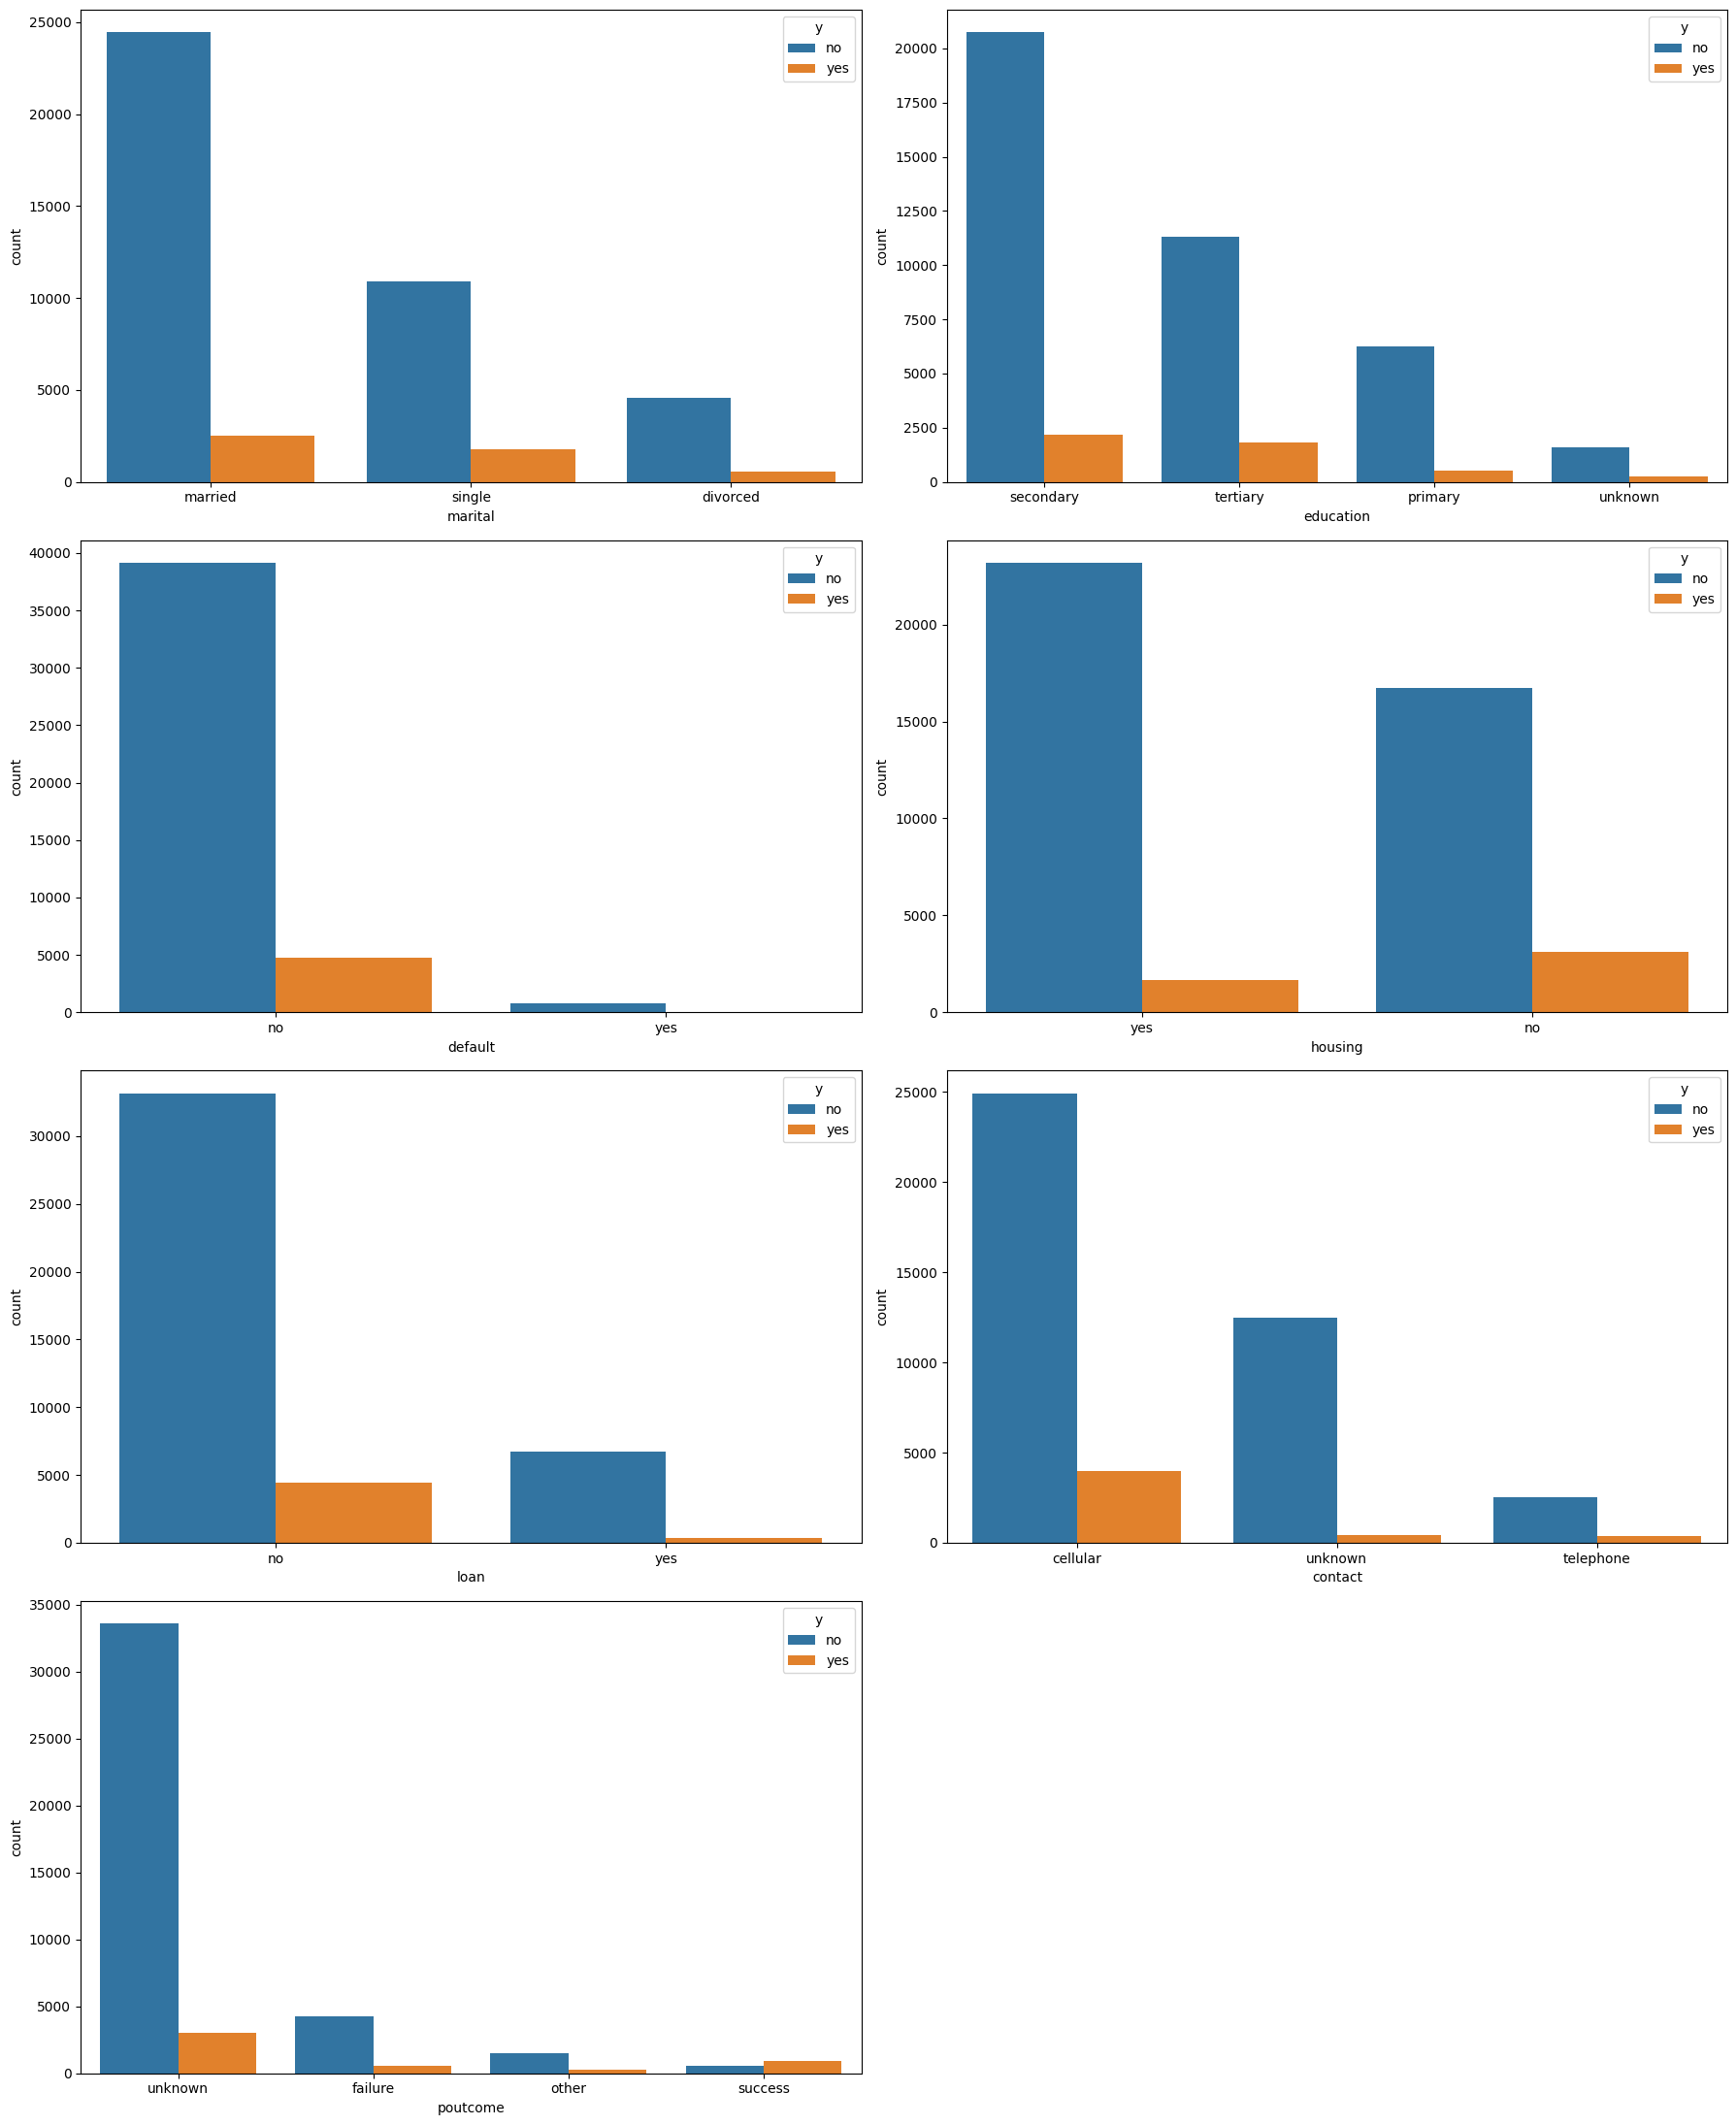

In [118]:
# bivariate analysis of remaining categorical variables and target column y(term deposit)

categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

plt.figure(figsize=(18,22))
n = 1
for column in categorical:
  ax = plt.subplot(4,2,n)
  sns.countplot(x = column, hue='y', data=bank_df, order=bank_df[column].value_counts().index)
  plt.xlabel(column)
  plt.tight_layout()
  n += 1
plt.show()

**Observations :**
- Customers who do not have any personal, housing loan, or credit default have a higher ratio of subscribing to term deposit compared to those who have loans or credit defaults.

- In the education column, the percentage of customers who subscribed to term deposits is higher for those in the secondary and tertiary education categories. This suggests that the bank should focus more on customers in these categories.

- In the marital column, there is no clear pattern in the subscription ratio. However, the bank should focus more on married and single customers who are students. This is because we observed in the previous chart that students have a higher subscription ratio in the job column.

- In the poutcome column, we clearly see that customers who subscribed to term deposits in the previous marketing campaign are more likely to subscribe again. This indicates a high chance of success in targeting these customers.

#### **Univariate and Bivariate Analysis of numerical variables**

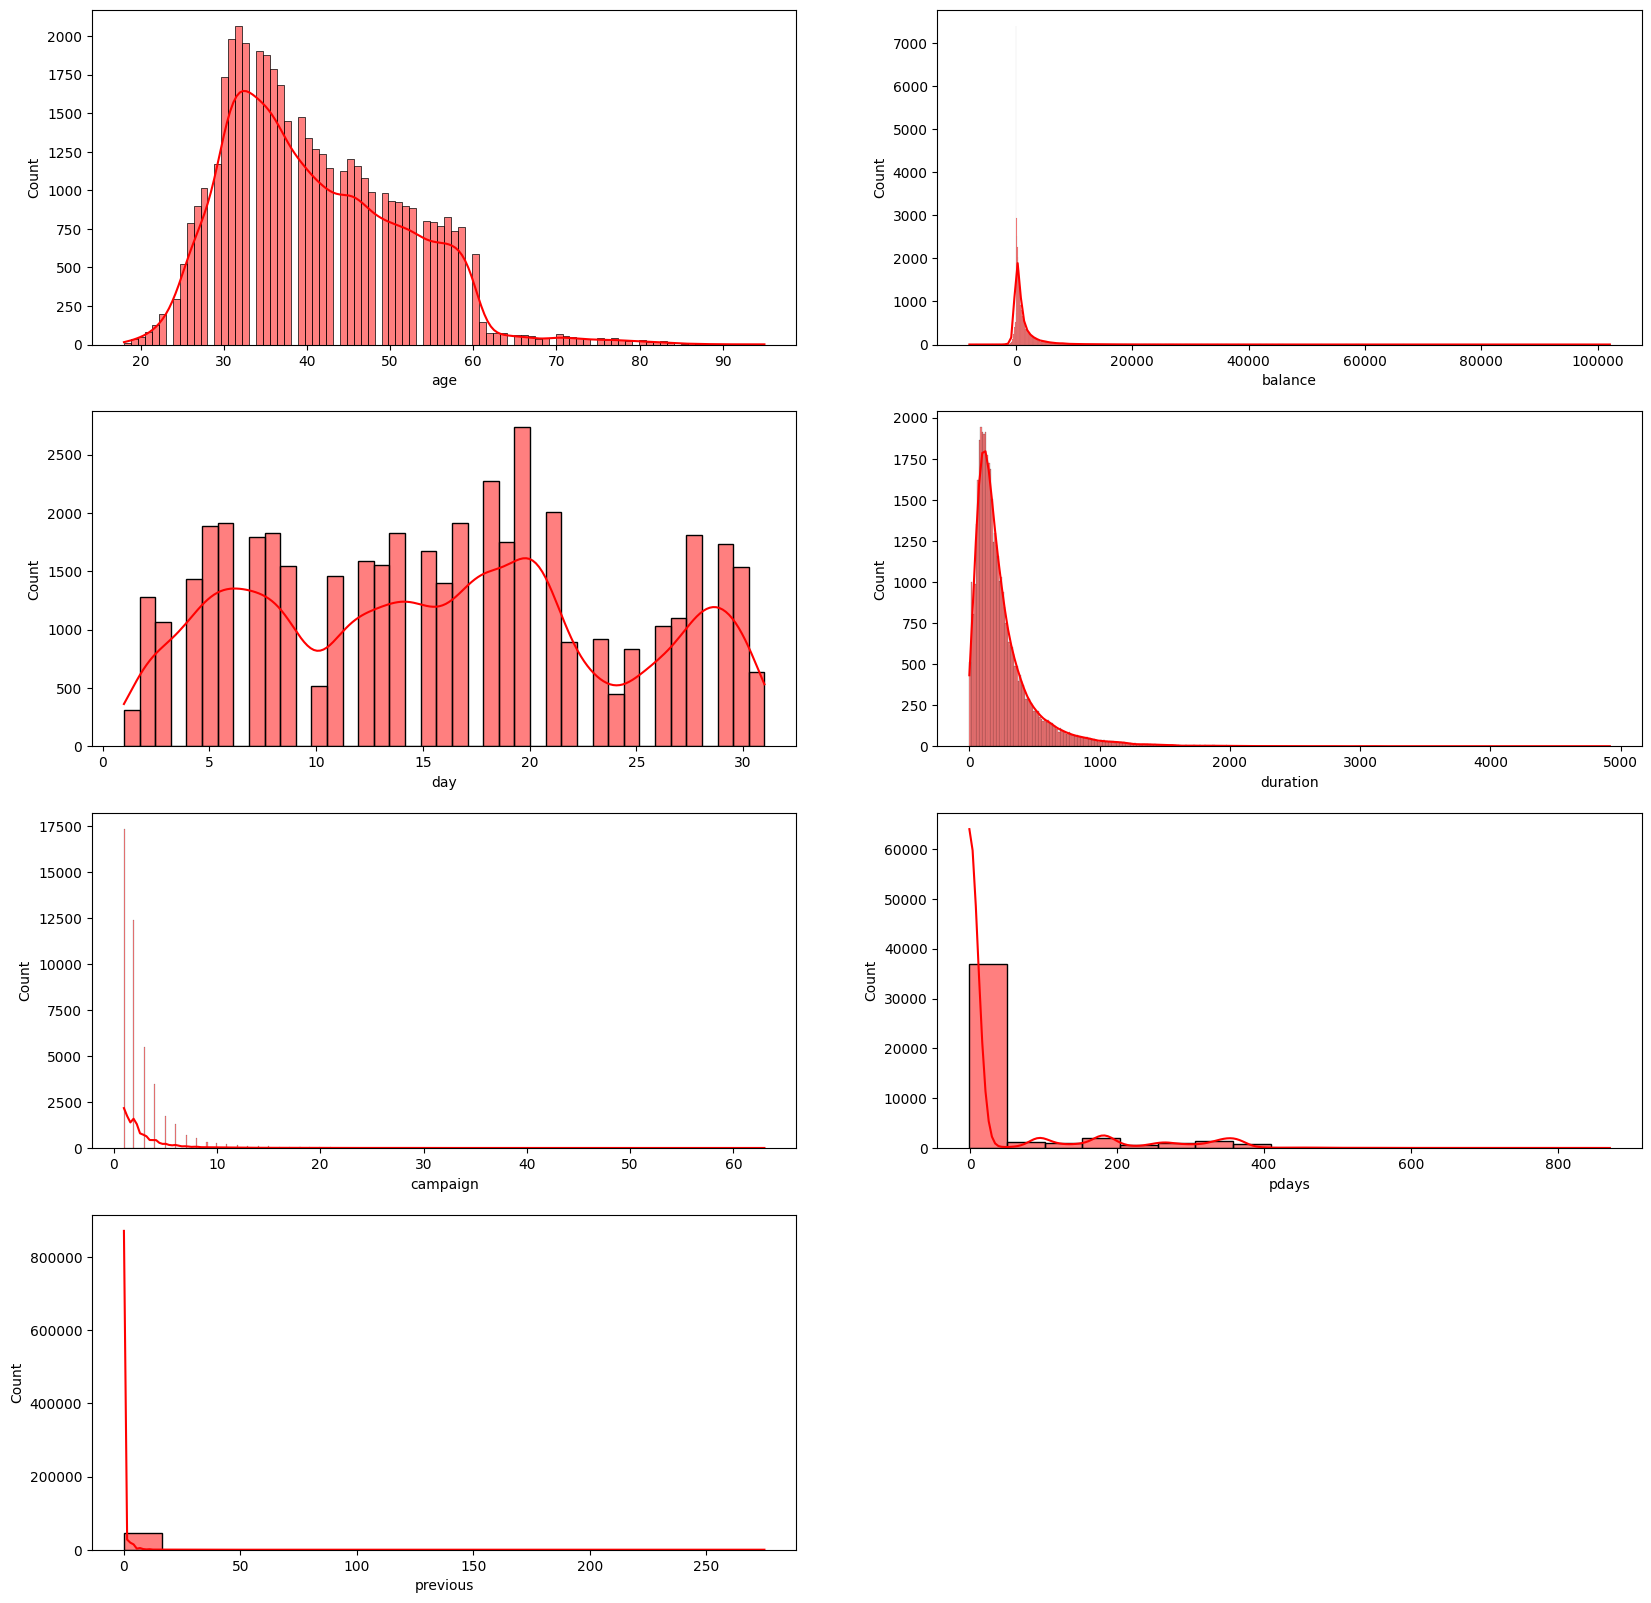

In [119]:
# check distribution of all numerical column

plt.figure(figsize=(20,20))

n=1
for col in numerical_columns:
  ax = plt.subplot(4,2,n)
  sns.histplot(bank_df[col], kde=True, color ='red')
  n += 1
plt.show()

**observations :**
- The numerical columns 'age', 'balance', and 'duration' are right skewed, indicating that there may be some outliers present in the data. they are far away from the normal range of values and can significantly affect the analysis

- As per the histogram, there are some customers who are above 65+ years of age and have been contacted for term deposit. This may not be a sensible strategy as these customers may not have a long enough investment horizon to benefit from the term deposit. we have to analysis of old age customers subscribed and non-subscribed ratio.

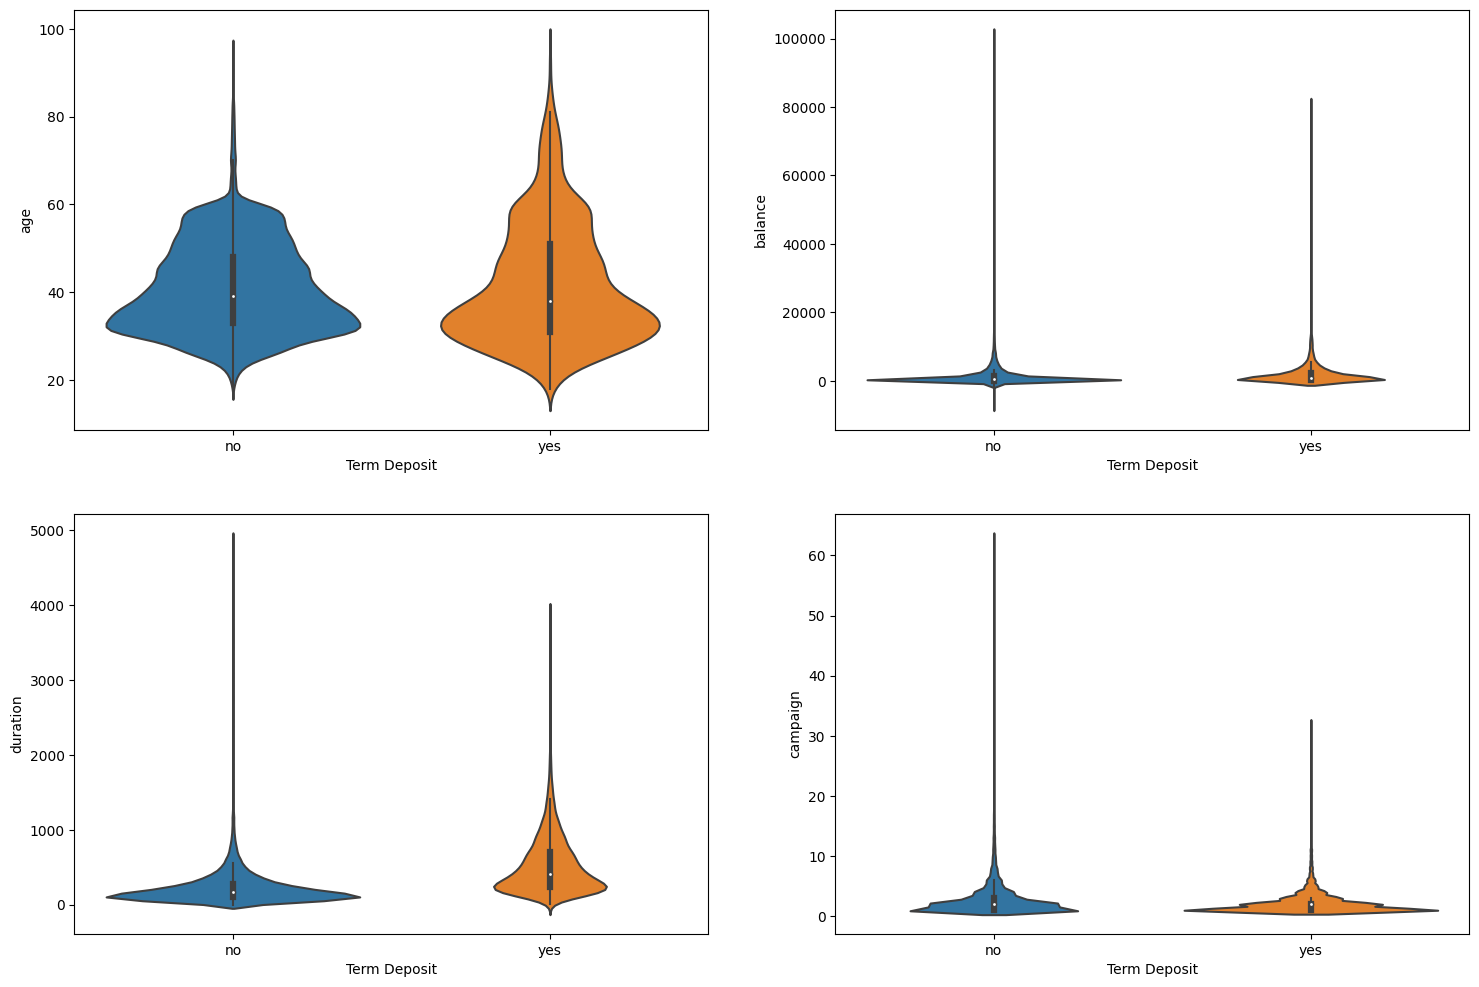

In [120]:
# Visualizing the distribution of customers subscribed or not term deposit using a violin plot with numerical columns

columns = ['age','balance','duration','campaign']

plt.figure(figsize=(18,12))
n=1
for col in columns:
  ax = plt.subplot(2,2,n)
  sns.violinplot(x='y', y=col ,data=bank_df)
  plt.xlabel('Term Deposit')
  n += 1
plt.show()

**observations:-**
- `Age :` From the violin plot, we can observe that customers in **the age group of 20 to 30** have a higher chance of subscribing to the term deposit. However, after **60+ age**, there is also a high ratio of customers who subscribed. It is important to note that the number of customers contacted in the **60+ age** group is less, which could be a factor in the observed trend.

- `Balance :` The distribution of balance suggests that customers with **less balance are less likely to subscribe** to the term deposit.

- `Duration :` We can see that when the duration of the last contact made with the customer is higher, there is a very high chance that the customer subscribed to the term deposit.

- `Campaign :` From the violin plot, we can observe that customers who were contacted **5 or fewer times** during the current marketing campaign are more likely to subscribe to the term deposit.

▪  These observations suggest that age, balance, duration, and campaign are important factors in determining whether a customer will subscribe to the term deposit.

#### **Analysis of both categorical and numerical variables**

In [121]:
plt.figure(figsize=(18,6))

sns.countplot(x='job', hue='default', data=bank_df)
plt.xlabel('Job Categories of Bank Customers', color='black')
plt.ylabel('Total Count of Credit Default', color='black')

plt.tight_layout()
plt.show()

**observations :-**
- Based on the previous analysis, it can be observed that student and retired customers have a higher likelihood of subscribing to term deposits. This could be due to the fact that they have a lower number of credit defaults, as well as potentially having more available time and resources to consider long-term investments.

- Furthermore, it is important for the bank to focus on customers in certain job categories, such as blue-collar, admin, management, and services. These categories have shown a significant portion of customers subscribing to term deposits.

- On the other hand, it may not be a good strategy to contact customers in categories such as entrepreneur, unemployed, and self-employed as they have shown a lower likelihood of subscribing to term deposits. However, it is important to note that there may be other factors such as bank balance and loan status that could also influence a customer's decision to subscribe.

In [122]:
# check the average duration of customers based on term deposit

plt.figure(figsize=(8,4))

sns.barplot(y='duration',x='y',data=bank_df)
plt.tight_layout()
plt.show()

**observation :**  
If the duration of the last contact made with the customer is **500+ seconds**, then the ratio of subscribed and non-subscribed customers becomes equal and more in favor of subscribed customers.

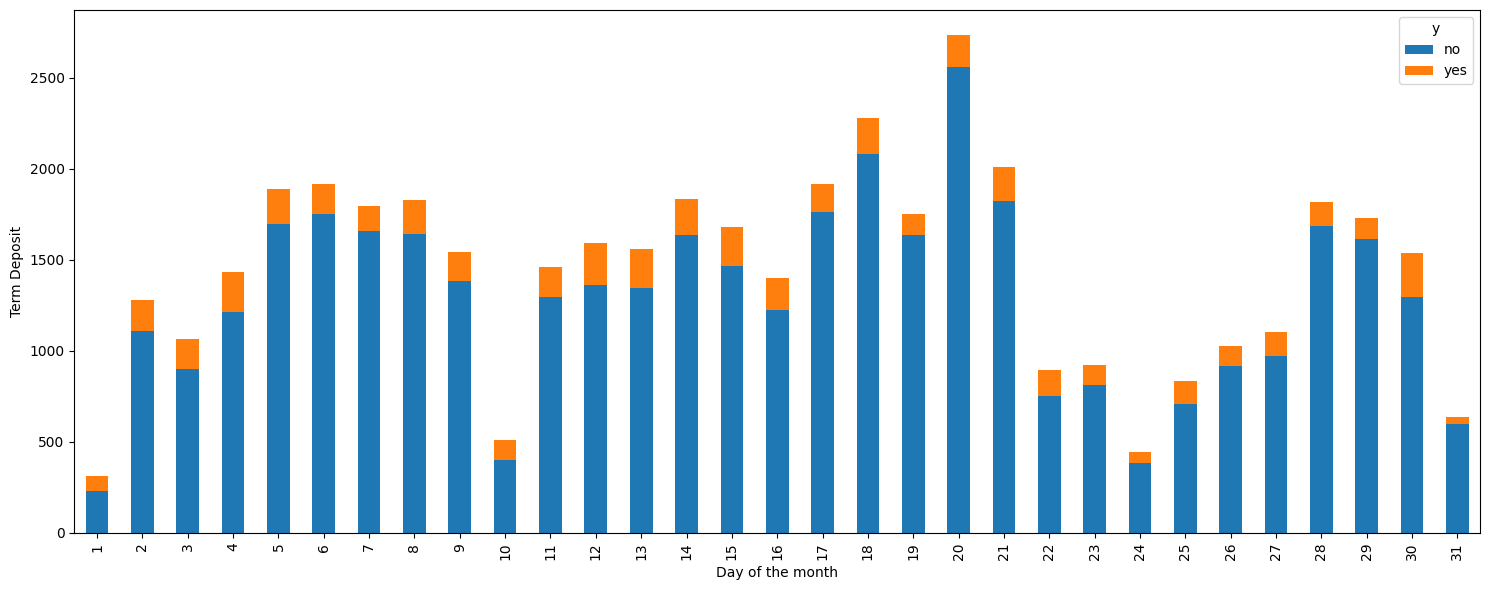

In [123]:
# find out which day of the month was the client contacted more

types = bank_df.groupby("day")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True', xlabel=('Day of the month'), ylabel=('Term Deposit'), figsize=(15,6))
plt.tight_layout()
plt.show()

- The larger number of clients were contacted during the middle of the month. However, the ratio of term deposits remained relatively consistent throughout the days of the month, except for the last day (day 30), which had a slightly higher chance of customers subscribing to term deposits. Therefore, it would be beneficial for the bank to focus more on the last day of the month for contacting customers. This could be due to various reasons, such as customers being more willing to invest towards the end of the month when they have a better understanding of their monthly budget, or the bank having better offers or incentives towards the end of the month to encourage customers to invest in term deposits.

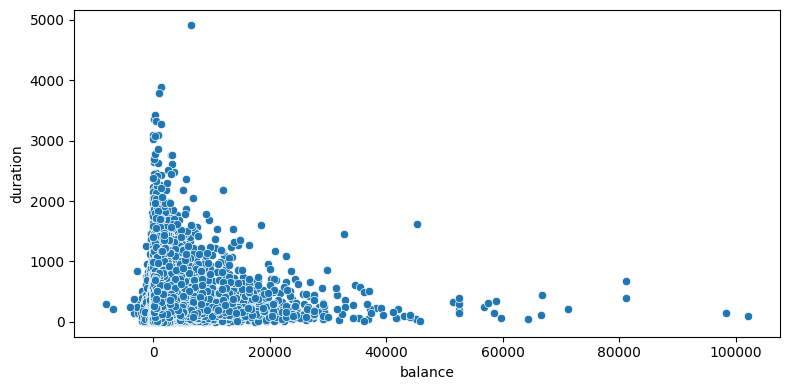

In [124]:
# checking the corr. of balance and duration column

plt.figure(figsize=(8,4))

sns.scatterplot(x='balance', y='duration', data=bank_df)
plt.tight_layout()
plt.show()

- From the scatter plot, we can observe that customers with a low or zero bank balance are contacted more frequently by the bank. This strategy may not be the most effective as customers with low balance have a higher ratio of non-subscribed term deposit. Hence, the bank should focus on medium and high bank balance customers when contacting them to increase the likelihood of a positive outcome.

## **Feature Engineering**

#### **Check Outliers**

In [125]:
# ploting a boxplot for numerical features to check the outliers

columns = ['age','balance']

plt.figure(figsize=(10,4))

n = 1
for col in columns:
    ax = plt.subplot(1,2,n)
    sns.boxplot(x=bank_df[col], color='#8FBC8F')
    plt.xlabel(col)
    n += 1
plt.show()

- In these scenarios, it is not advisable to remove outliers from the dataset as they contain valuable information. For example, in the bank balance column, some customers have high balances while some have non-positive balances. If we remove these outliers, our model will not have sufficient information to make accurate predictions, and there is a risk of overfitting.

- Similarly, for the age column, there are outliers in the dataset, but we need to train our model to make predictions based on all available factors. If we remove the outliers, we may lose critical information that can affect the accuracy of our model. Therefore, it is important to keep the outliers in the dataset and use appropriate techniques to handle them during model training. here not any issue because we use robust algorithms.

#### **features transformation and selection**

In [126]:
# converting job column into new categorical column by assinging categories

def job_category(job):
  cat_1 = ['retired','student']
  cat_2 = ['blue-collar','management','technician','admin.','services']
  cat_3 = ['unemployed','housemaid','unknown']
  cat_4 = ['self-employed','entrepreneur']

  if job in cat_1 :
      return 'cat1'
  if job in cat_2 :
      return 'cat2'
  if job in cat_3 :
      return 'cat3'
  if job in cat_4 :
      return 'cat4'
  return job

In [127]:
# apply function job_category for add new column in dataset

bank_df['job_categories']=bank_df['job'].apply(job_category)

bank_df.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y job_categories  
0    5   may       261         1     -1         0  unknown  no           cat2  
1    5   may       151         1     -1         0  unknown  no           cat2

In [128]:
# explore new column with term deposit(y) column

types = bank_df.groupby('job_categories')['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', xlabel=('Job Categories'), ylabel=('Term Deposit'), figsize=(8,4))
plt.tight_layout()
plt.show()

**observations :**

- we observed that category 1 and 2 have a high subscription ratio of term deposit. However, we noticed that the bank contacted more customers in category 2 as compared to category 1. This suggests that the bank should focus more on category 2 customers, but at the same time, they should not ignore category 1 customers as well, because even though the number of customers is less, the ratio of subscribed customers is still high.

- the bank should try to strike a balance between these two categories and allocate their resources accordingly to maximize their subscription rate.

In [129]:
# converting age column into new categorical column by assinging categories

def age_category(age):
  if age < 30:
     return 'struggling'
  elif age < 50:
     return 'stable'
  elif age < 60:
     return 'about to retire'
  elif age < 75:
     return 'old age'
  else:
     return 'counting a last breathe'

In [130]:
# apply function age_category for add new column in dataset

bank_df['age_categories']=bank_df['age'].apply(age_category)

bank_df.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y job_categories  \
0    5   may       261         1     -1         0  unknown  no           cat2   
1    5   may       151         1     -1         0  unknown  no           cat2   

    age_categories  
0  about to retire  
1           stable

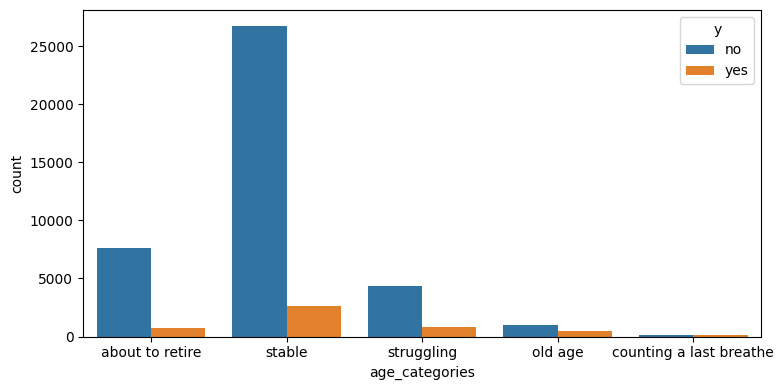

In [131]:
# explore new column age_categories with term deposit(y) column

plt.figure(figsize=(8,4))

sns.countplot(x='age_categories', hue='y', data=bank_df)
plt.xlabel('age_categories', color='black')
plt.tight_layout()
plt.show()

- bank should focus more on struggling and about to retire categories also

In [132]:
# scatterplot

plt.figure(figsize=(8,4))
sns.scatterplot(data=bank_df, x='age_categories',y='duration',hue='y')
plt.tight_layout()
plt.show()

**observations:-**

- Conclusion From the above scatter plot we can conclude that when the age categories are old_age and stable the duration of communication is more and when the duration is high then there is high possibility that clients will subscribe for term deposite.

- From the above scatterplot we can conclude that when the contact duration is from 300 to 2000 in stable, struggling, about to retire columns and client balance is in the middle range 500-35000 then those clients subscribe for term deposit mostly.

In [133]:
# Rename target column 'y' to 'term_deposit'

bank_df = bank_df.rename(columns={'y':'term_deposit'})

In [134]:
# converting those features into binary class numeric features

bank_df["default"]=bank_df["default"].apply(lambda x : 1 if x=='yes' else 0)
bank_df["loan"]=bank_df["loan"].apply(lambda x : 1 if x=='yes' else 0)
bank_df["housing"]=bank_df["housing"].apply(lambda x : 1 if x=='yes' else 0)
bank_df["term_deposit"]=bank_df["term_deposit"].apply(lambda x : 1 if x=='yes' else 0)

bank_df.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary       0     2143       1    0  unknown   
1   44  technician   single  secondary       0       29       1    0  unknown   

   day month  duration  campaign  pdays  previous poutcome term_deposit  \
0    5   may       261         1     -1         0  unknown            0   
1    5   may       151         1     -1         0  unknown            0   

  job_categories   age_categories  
0           cat2  about to retire  
1           cat2           stable

In [135]:
# droppping columns because we have extracted new features from that columns.

bank_df.drop(columns=['age','job','pdays','duration'], axis=1, inplace=True)

- The columns 'pdays' and 'duration' were removed from the dataset as they are not relevant for building a predictive model for new customers. 'duration' represents the duration of the last contact with the customer in the previous campaign, and 'pdays' represents the number of days that have passed since the customer was last contacted. As we are building a model for new customers, this information is not available for them. Hence, removing these columns will prevent any bias or overfitting that may result from using irrelevant or unavailable data.

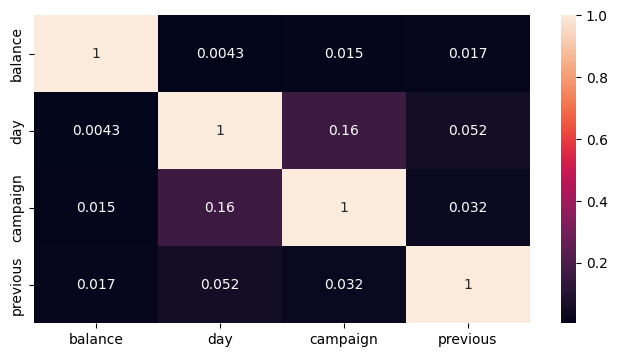

In [136]:
# Plotting correlation matrix to find multicollinearity

plt.subplots(figsize=(8,4))
sns.heatmap(bank_df.corr().abs(), annot=True)
plt.show()

- there is no significant multicollinearity between the independent variables. Therefore, we can conclude that the model is robust and the independent variables are suitable for predicting the dependent variable

## **pre-processing**

#### **Encoding categorical columns**